In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [2]:
import os
os.getcwd()
# Any results you write to the current directory are saved as output.

'C:\\Users\\ajaohri'

In [3]:
os.chdir('C:\\Users\\ajaohri\\Desktop\\Howathon')

In [4]:
os.listdir()


['HOWathon-41-Bangalore-AttritionPredictor.pptx',
 'ibm-hr-analytics-employee-attrition-performance.zip',
 'Survival_Analysis.ipynb',
 'WA_Fn-UseC_-HR-Employee-Attrition.csv']

In [6]:
!pip install lifelines

  Running setup.py bdist_wheel for autograd: started
  Running setup.py bdist_wheel for autograd: finished with status 'done'
  Stored in directory: C:\Users\ajaohri\AppData\Local\pip\Cache\wheels\72\6f\c2\40f130cca2c91f31d354bf72de282922479c09ce0b7853c4c5
Successfully built autograd


You are using pip version 18.0, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [7]:
from lifelines import KaplanMeierFitter

In [8]:
import numpy as np
import pandas as pd

In [9]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [10]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [11]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [13]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [14]:
# Defining a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Using the pandas apply method to numerically encode our attrition target variable
data["Attrition_numerical"] = data["Attrition"].apply(lambda x: target_map[x])

In [15]:
data.YearsAtCompany.shape

(1470,)

In [16]:
data.Attrition_numerical.shape

(1470,)

In [17]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter() 


In [18]:
kmf.fit(durations = data.YearsAtCompany, event_observed = data.Attrition_numerical)

<lifelines.KaplanMeierFitter: fitted with 1470 observations, 1233 censored>

In [19]:
kmf.event_table


,removed,observed,censored,entrance,at_risk
event_at,,,,,
0,44,16,28,1470,1470
1,171,59,112,0,1426
2,127,27,100,0,1255
3,128,20,108,0,1128
4,110,19,91,0,1000
5,196,21,175,0,890
6,76,9,67,0,694
7,90,11,79,0,618
8,80,9,71,0,528


In [20]:
# get the values for time = 0 from the survival table
event_at_0 = kmf.event_table.iloc[0, :]
# now calculate the survival probability for t = 0
surv_for_0 =  (event_at_0.at_risk - event_at_0.observed) / event_at_0.at_risk
surv_for_0

0.9891156462585035

In [21]:
# Calculate the survival probability for t = 1
event_at_1 = kmf.event_table.iloc[1, :]
surv_for_1 =  (event_at_1.at_risk - event_at_1.observed) / event_at_1.at_risk
surv_for_1

0.958625525946704

In [22]:
# Calculate the survival probability for t = 2
event_at_2 = kmf.event_table.iloc[2, :]
surv_for_2 =  (event_at_2.at_risk - event_at_2.observed) / event_at_2.at_risk
surv_for_2

0.9784860557768924

In [23]:
# The probability that an employee has a career longer than 2 years
surv_after_2 = surv_for_0 * surv_for_1 * surv_for_2
surv_after_2

0.9277921674304965

In [24]:
kmf.predict(2)

0.9277921674304962

In [25]:
# The survival probabilities of employee after 1, 3, 5, and 10 yrs played
kmf.predict([1,3,5,10])

1     0.948192
3     0.911342
5     0.872931
10    0.776815
Name: KM_estimate, dtype: float64

In [26]:
kmf.survival_function_


,KM_estimate
timeline,
0.0,0.989116
1.0,0.948192
2.0,0.927792
3.0,0.911342
4.0,0.894026
5.0,0.872931
6.0,0.861611
7.0,0.846275
8.0,0.831850


In [27]:
kmf.median_

40.0

In [28]:
"""The median_ attribute also provides us the number of years where on average 50% of employees are out of the company.

"""

'The median_ attribute also provides us the number of years where on average 50% of employees are out of the company.\n\n'

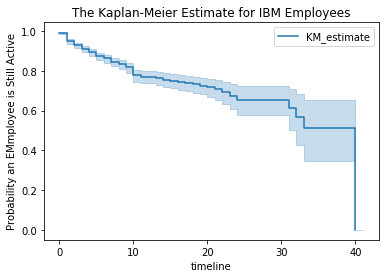

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
kmf.plot()
plt.title("The Kaplan-Meier Estimate for IBM Employees")
plt.ylabel("Probability an EMmployee is Still Active")

plt.show()

In [31]:
    """Cox Proportional Hazard Model"""

'Cox Proportional Hazard Model'

In [32]:
from lifelines import CoxPHFitter


In [33]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition_numerical'],
      dtype='object')

In [34]:
data_1 = pd.get_dummies(data,drop_first=True)# drop_first=True should be used

In [35]:
data_1.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0


In [37]:
data_1.drop(['Attrition_Yes'], axis=1, inplace=True)

In [38]:
data_1.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition_numerical', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRo

In [39]:
data_1.replace([np.inf, -np.inf], np.nan, inplace = True)

In [40]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
names = data_1.columns

scaled_data = scaler.fit_transform(data_1)
scaled_data = pd.DataFrame(scaled_data, columns=names)

In [42]:
## Removing as there is no variation in the below columns
scaled_data.drop(['StandardHours','EmployeeCount'], axis = 1, inplace = True)

In [43]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object


In [44]:
cph.fit(scaled_data, duration_col='YearsAtCompany',show_progress=True, event_col='Attrition_numerical')


Iteration 1: norm_delta = 0.96634, step_size = 0.9500, ll = -9255.30149, newton_decrement = 866.08348, seconds_since_start = 0.8
Iteration 2: norm_delta = 0.54213, step_size = 0.9500, ll = -8278.75937, newton_decrement = 170.07578, seconds_since_start = 0.8
Iteration 3: norm_delta = 0.20259, step_size = 0.9500, ll = -8090.81750, newton_decrement = 12.82676, seconds_since_start = 0.8
Iteration 4: norm_delta = 0.03354, step_size = 1.0000, ll = -8077.43553, newton_decrement = 0.23250, seconds_since_start = 0.8
Iteration 5: norm_delta = 0.00057, step_size = 1.0000, ll = -8077.20077, newton_decrement = 0.00006, seconds_since_start = 0.9
Iteration 6: norm_delta = 0.00000, step_size = 1.0000, ll = -8077.20072, newton_decrement = 0.00000, seconds_since_start = 0.9
Convergence completed after 6 iterations.


<lifelines.CoxPHFitter: fitted with 1470 observations, 0 censored>

In [46]:
cph.print_summary()  

<lifelines.CoxPHFitter: fitted with 1470 observations, 0 censored>
      duration col = 'YearsAtCompany'
         event col = 'Attrition_numerical'
number of subjects = 1470
  number of events = 1470
    log-likelihood = -8077.20
  time fit was run = 2019-02-21 08:15:10 UTC

---
                                   coef  exp(coef)  se(coef)      z      p  -log2(p)  lower 0.95  upper 0.95
Age                                0.11       1.12      0.04   2.84 <0.005      7.79        0.03        0.19
DailyRate                          0.02       1.02      0.03   0.79   0.43      1.23       -0.03        0.08
DistanceFromHome                  -0.02       0.98      0.03  -0.56   0.57      0.81       -0.07        0.04
Education                         -0.00       1.00      0.03  -0.07   0.94      0.08       -0.06        0.05
EmployeeNumber                    -0.06       0.94      0.03  -2.17   0.03      5.05       -0.11       -0.01
EnvironmentSatisfaction           -0.01       0.99      0.03  -0.3

In [47]:
cph.score_

0.8945785510885177

In [52]:
cph.predict_partial_hazard(scaled_data)

,0
0,2.325692
1,0.422945
2,26.311668
3,1.922524
4,10.440630
5,0.380552
6,14.734110
7,27.377760
8,0.226514
9,0.126266


In [51]:
cph.predict_survival_function(scaled_data, times=[5., 25., 50.])

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
5.0,0.0,1.925992e-171,0.0,0.0,0.0,2.489372e-154,0.0,0.0,3.725481e-92,1.083265e-51,...,0.0,0.0,6.728207e-08,6.787619e-213,0.0,0.0,1.163602e-136,0.0,3.153685e-50,0.0
25.0,0.0,3.838657e-255,0.0,0.0,0.0,1.216817e-229,0.0,0.0,5.550182e-137,1.113886e-76,...,0.0,0.0,2.048666e-11,6.414648e-317,0.0,0.0,2.619813e-203,0.0,1.693378e-74,0.0
50.0,0.0,3.838657e-255,0.0,0.0,0.0,1.216817e-229,0.0,0.0,5.550182e-137,1.113886e-76,...,0.0,0.0,2.048666e-11,6.414648e-317,0.0,0.0,2.619813e-203,0.0,1.693378e-74,0.0


In [50]:
cph.predict_median(scaled_data)

,0.5
0,-0.327893
1,0.325228
2,-0.981014
3,-0.327893
4,-0.817734
5,0.325228
6,-0.817734
7,-0.981014
8,0.488508
9,0.651788


In [ ]:
#https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html

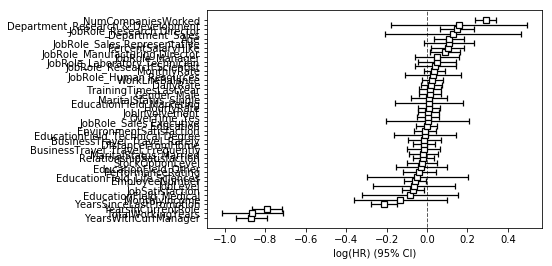

In [53]:
cph.plot()


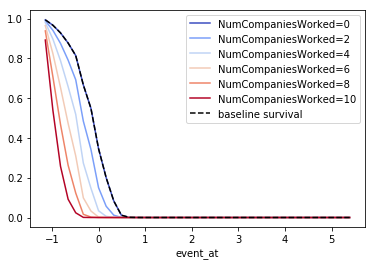

In [55]:
cph.plot_covariate_groups('NumCompaniesWorked', [0, 2, 4, 6, 8, 10], cmap='coolwarm')
